In [3]:
#import all libraries need for the lesson 1
# General syntax to import specific functions in a library
## from (library) import  specific library function
from pandas import DataFrame , read_csv

# general syntax to import a library but no function
## import (library) as (give the liibrary as nickname/alias)

import matplotlib.pyplot as plot
import pandas as panda
import sys## to determine python version number
import matplotlib ## only need to determine matplotlib version number

# Enable inline plotting
%matplotlib inline

In [7]:
print('python Version ' + sys.version)
print('pandas version ' + panda.__version__)
print('Matplotlib ' + matplotlib.__version__)

python Version 3.5.1 |Anaconda 2.5.0 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
pandas version 0.17.1
Matplotlib 1.5.1


# Create Data

In [8]:
# The initial set of baby names and birth rates
names = ['Bob','Jessica','Marry','John','Mel']
births = [968,155,77,578,973] ## number of biths recorded 

### To merge these two list together we will use the zip function

In [10]:
zip?


In [20]:
babyDataSet = list(zip(names, births))
babyDataSet

[('Bob', 968), ('Jessica', 155), ('Marry', 77), ('John', 578), ('Mel', 973)]

### convert list to dictionary

In [21]:
babyDataSetDict = dict(babyDataSet)
babyDataSetDict

{'Bob': 968, 'Jessica': 155, 'John': 578, 'Marry': 77, 'Mel': 973}

We are basically done creating the data set. We now will use the pandas library to export this data set into a csv file.

df will be a DataFrame object. You can think of this object holding the contents of the BabyDataSet in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside df.

In [24]:
panda.DataFrame?


Init signature: panda.DataFrame(self, data=None, index=None, columns=None, dtype=None, copy=False)

Docstring:

Two-dimensional size-mutable, potentially heterogeneous tabular data

structure with labeled axes (rows and columns). Arithmetic operations

align on both row and column labels. Can be thought of as a dict-like

container for Series objects. The primary pandas data structure

Parameters

----------

data : numpy ndarray (structured or homogeneous), dict, or DataFrame

    Dict can contain Series, arrays, constants, or list-like objects
    
index : Index or array-like

    Index to use for resulting frame. Will default to np.arange(n) if
    
    no indexing information part of input data and no index provided
    
columns : Index or array-like

    Column labels to use for resulting frame. Will default to
    
    np.arange(n) if no column labels are provided
    
dtype : dtype, default None

    Data type to force, otherwise infer
    
copy : boolean, default False

    Copy data from inputs. Only affects DataFrame / 2d ndarray input

Examples

--------

>>> d = {'col1': ts1, 'col2': ts2}

>>> df = DataFrame(data=d, index=index)

>>> df2 = DataFrame(np.random.randn(10, 5))

>>> df3 = DataFrame(np.random.randn(10, 5),

columns=['a', 'b', 'c', 'd', 'e'])

In [27]:
df = panda.DataFrame()# no data is provided
df

""


In [30]:
df = panda.DataFrame(data= babyDataSet)## only data is provided
df

,0,1
0,Bob,968
1,Jessica,155
2,Marry,77
3,John,578
4,Mel,973


In [102]:
df = panda.DataFrame(data=babyDataSet, columns=['Names', 'Births'])## column label is provided
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Marry,77
3,John,578
4,Mel,973


Export the dataframe to a csv file. We can name the file births1880.csv. The function to_csv will be used to export

the file. The file will be saved in the same location of the notebook unless specified otherwise.

In [49]:
df.to_csv?

Write DataFrame to a comma-separated values (csv) file

Signature: df.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True,

index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n',

chunksize=None, tupleize_cols=False, date_format=None, doublequote=True, escapechar=None, decimal='.', **kwds)

In [56]:
df.to_csv('births1.csv')

,Names,Births

0,Bob,968

1,Jessica,155

2,Marry,77

3,John,578

4,Mel,973



In [60]:
df.to_csv('births2.csv',index=False) ##remove index

Names,Births

Bob,968

Jessica,155

Marry,77

John,578

Mel,973

In [103]:
df.to_csv('births3.csv',index=False,header=False) ## no index and no header 

Bob,968

Jessica,155

Marry,77

John,578

Mel,973


# Get Data

To pull in the csv file, we will use the pandas function read_csv. Let us take a look at this function and what inputs 

it takes.


In [65]:
read_csv?

In [104]:
location3 = 'births3.csv'## csv with no header and index
df = panda.read_csv(location3)

Notice the r before the string. Since the slashes are special characters, prefixing the string with a r will escape 

the whole string.

In [105]:
df

,Bob,968
0,Jessica,155
1,Marry,77
2,John,578
3,Mel,973


This brings us the our first problem of the exercise. The read_csv function treated the first record in the csv file

as the header names. This is obviously not correct since the text file did not provide us with header names.

To correct this we will pass the header parameter to the read_csv function and set it to None (means null in python).

In [108]:
df = panda.read_csv(location3,header=None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Marry,77
3,John,578
4,Mel,973


If we wanted to give the columns specific names, we would have to pass another paramter called names. We can also omit 

the header parameter.



In [119]:
df = panda.read_csv(location,names=['Names','Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Marry,77
3,John,578
4,Mel,973


You can think of the numbers [0,1,2,3,4] as the row numbers in an Excel file. In pandas these are part of the index of

the dataframe. You can think of the index as the primary key of a sql table with the exception that an index is

allowed to have duplicates.

[Names, Births] can be though of as column headers similar to the ones found in an Excel spreadsheet or sql database.

Delete the csv file now that we are done using it.

In [176]:
df = panda.read_csv(location,index_col=1)
df

,Bob
968,
155,Jessica
77,Marry
578,John
973,Mel


In [121]:
location1 = r'births1.csv'# default csv
panda.read_csv(location1)

,Unnamed: 0,Names,Births
0,0,Bob,968
1,1,Jessica,155
2,2,Marry,77
3,3,John,578
4,4,Mel,973


In [123]:
import os
os.remove(location1) ## delete csv 

In [124]:
location2 = r'births2.csv'
panda.read_csv(location2)

,Names,Births
0,Bob,968
1,Jessica,155
2,Marry,77
3,John,578
4,Mel,973


In [125]:
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Marry,77
3,John,578
4,Mel,973


In [127]:
## check data type of the columns
df.dtypes

Names     object
Births     int64
dtype: object

In [130]:
## check data type of the births column
df.Births.dtype

dtype('int64')

As you can see the Births column is of type int64, thus no floats (decimal numbers) or alpha numeric characters will 

be present in this column.



# Analyze Data

To find the most popular name or the baby name with the higest birth rate, we can do one of the following.

Sort the dataframe and select the top row


Use the max() attribute to find the maximum value

In [166]:
# Method 1
sorted = df.sort_values(['Births'],ascending=False)
sorted


,Names,Births
4,Mel,973
0,Bob,968
3,John,578
1,Jessica,155
2,Marry,77


In [165]:
sorted.head(1) ## sorting and selection top row to find most popular name

,Names,Births
4,Mel,973


In [150]:
# method 2 using max()
df['Births'].max()

973

In [154]:
df['Names'][df['Births']]

Births
968    NaN
155    NaN
77     NaN
578    NaN
973    NaN
Name: Names, dtype: object

In [160]:
##IS EQUAL TO Select all of the records in the Names column WHERE [The
##Births column is equal to 973]

df['Names'][df['Births'] == df['Births'].max()]

4    Mel
Name: Names, dtype: object

In [162]:
#IS EQUAL TO [Find all of the records in the Births column where it is equal to 973]
df['Births'] == df['Births'].max() 

0    False
1    False
2    False
3    False
4     True
Name: Births, dtype: bool

In [188]:
df['Births'].min()

77

In [191]:
sorted['Names'].head(1).values

array(['Mel'], dtype=object)

# Presenting Data

Here we can plot the Births column and label the graph to show the end user the highest point on the graph. In

conjunction with the table, the end user has a clear picture that Mel is the most popular baby name in the data set.

plot() is a convinient attribute where pandas lets you painlessly plot the data in your dataframe. We learned how to

find the maximum value of the Births column in the previous section. Now to find the actual baby name of the 973 value 

looks a bit tricky, so lets go over it.

Explain the pieces:

df['Names'] - This is the entire list of baby names, the entire Names column

df['Births'] - This is the entire list of Births in the year 1880, the entire Births column

df['Births'].max() - This is the maximum value found in the Births column


[df['Births'] == df['Births'].max()] IS EQUAL TO [Find all of the records in the Births column where it is equal to 

973]

df['Names'][df['Births'] == df['Births'].max()] IS EQUAL TO Select all of the records in the Names column WHERE [The 

Births column is equal to 973]


An alternative way could have been to use the Sorted dataframe:

Sorted['Names'].head(1).value

The str() function simply converts an object into a string.


In [178]:
df

,Bob
968,
155,Jessica
77,Marry
578,John
973,Mel


In [179]:
df = panda.read_csv(location,names=['Names','Births'])

df

,Names,Births
0,Bob,968
1,Jessica,155
2,Marry,77
3,John,578
4,Mel,973


In [180]:
df['Births']

0    968
1    155
2     77
3    578
4    973
Name: Births, dtype: int64

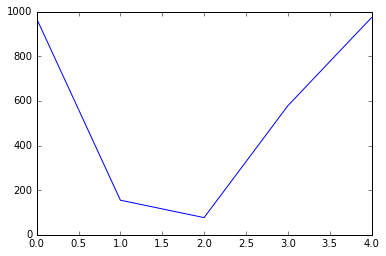

In [200]:
# Create graph
df['Births'].plot()



In [192]:
#Maximum value in the data set

maxValue = df['Births'].max()

# Name associated with the maximum value
#maxName = df['Names'][4]
maxName = df['Names'][df['Births']== df['Births'].max()].values
maxName

array(['Mel'], dtype=object)

The most popular name


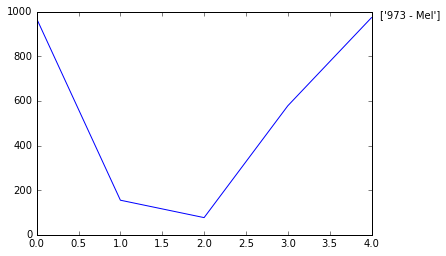

In [211]:

# Text to display on graph
text = str(maxValue) + " - " +maxName

plot.annotate(text, xy=(1, maxValue),xytext=(8,0),xycoords=("axes fraction","data"),textcoords='offset points')
print("The most popular name")
df[df['Births'] == df['Births'].max()]
df['Births'].plot()


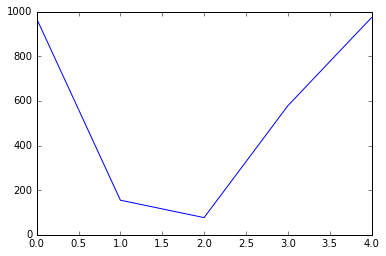

In [213]:
df['Births'].plot()

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 2 columns):
Names     5 non-null object
Births    5 non-null int64
dtypes: int64(1), object(1)
memory usage: 120.0+ bytes
